In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import pandas as pd
import pandas_datareader as pdr

In [12]:
start_date = '2001-01-02'
end_date = '2016-12-30'

fx_jpusdata = pdr.DataReader("DEXJPUS", "fred", start_date, end_date)
fx_useudata = pdr.DataReader("DEXUSEU", "fred", start_date, end_date)

In [13]:
fx_jpusdata

,DEXJPUS
DATE,
2001-01-02,114.73
2001-01-03,114.26
2001-01-04,115.47
2001-01-05,116.19
2001-01-08,115.97
...,...
2016-12-26,NaN
2016-12-27,117.52
2016-12-28,117.66


In [18]:
fx_jpusdata = fx_jpusdata.fillna(method="ffill")
fx_useudata = fx_useudata.fillna(method="ffill")

In [23]:
fx_jpusdata.isnull().sum()

DEXJPUS    0
dtype: int64

In [24]:
fx_useudata.isnull().sum()

DEXUSEU    0
dtype: int64

In [27]:
print(fx_jpusdata.describe())
print(fx_useudata.describe())

           DEXJPUS
count  4174.000000
mean    105.775220
std      14.612526
min      75.720000
25%      95.365000
50%     108.105000
75%     118.195000
max     134.770000
           DEXUSEU
count  4174.000000
mean      1.239633
std       0.165265
min       0.837000
25%       1.128100
50%       1.274700
75%       1.352575
max       1.601000


<AxesSubplot:xlabel='DATE'>

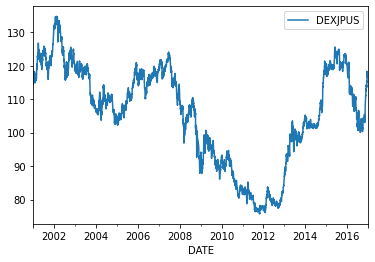

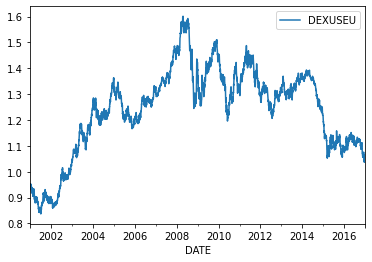

In [29]:
fx_jpusdata.plot()
fx_useudata.plot()

array([[<AxesSubplot:title={'center':'DEXUSEU'}>]], dtype=object)

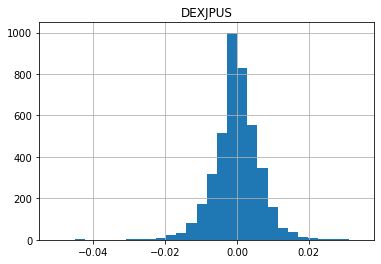

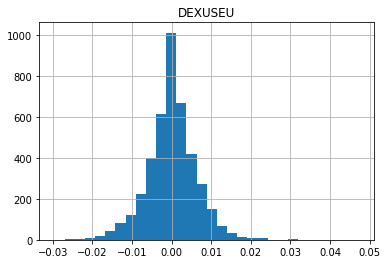

In [36]:
fx_jpusdata_r = (fx_jpusdata - fx_jpusdata.shift(1)) / fx_jpusdata.shift(1)
fx_useudata_r = (fx_useudata - fx_useudata.shift(1)) / fx_useudata.shift(1)

fx_jpusdata_r.hist(bins=30)
fx_useudata_r.hist(bins=30)

In [39]:
merge_data_jpusdata = pd.concat([fx_jpusdata, fx_jpusdata.shift(1), fx_jpusdata.shift(2), fx_jpusdata.shift(3)], axis=1)
merge_data_jpusdata.columns = ['Today', 'Pre_1', 'Pre_2', 'Pre_3']
merge_data_jpusdata

,Today,Pre_1,Pre_2,Pre_3
DATE,,,,
2001-01-02,114.73,NaN,NaN,NaN
2001-01-03,114.26,114.73,NaN,NaN
2001-01-04,115.47,114.26,114.73,NaN
2001-01-05,116.19,115.47,114.26,114.73
2001-01-08,115.97,116.19,115.47,114.26
...,...,...,...,...
2016-12-26,117.22,117.22,117.48,117.79
2016-12-27,117.52,117.22,117.22,117.48
2016-12-28,117.66,117.52,117.22,117.22


In [40]:
merge_data_jpusdata_noNaN = merge_data_jpusdata.dropna()

In [42]:
merge_data_jpusdata_noNaN.head()

,Today,Pre_1,Pre_2,Pre_3
DATE,,,,
2001-01-05,116.19,115.47,114.26,114.73
2001-01-08,115.97,116.19,115.47,114.26
2001-01-09,116.64,115.97,116.19,115.47
2001-01-10,116.26,116.64,115.97,116.19
2001-01-11,117.56,116.26,116.64,115.97


In [44]:
from datetime import datetime, date, timedelta
from dateutil.relativedelta import relativedelta

from sklearn import linear_model

l_model = linear_model.LinearRegression()

pre_term = '2016-11'
pos_term = '2016-12'

for pre_list in (['Pre_1'], ['Pre_1', 'Pre_2'], ['Pre_1', 'Pre_2', 'Pre_3']):
    print(pre_list)
    train = merge_data_jpusdata_noNaN[pre_term]
    X_train = pd.DataFrame(train[pre_list])
    Y_train = train['Today']
    
    test = merge_data_jpusdata_noNaN[pos_term]
    X_test = pd.DataFrame(test[pre_list])
    Y_test = test['Today']
    
    fit_model = l_model.fit(X_train, Y_train)
    print('Train : ', fit_model.__class__.__name__, fit_model.score(X_train, Y_train))
    print('Test : ', fit_model.__class__.__name__, fit_model.score(X_test, Y_test))

['Pre_1']
Train :  LinearRegression 0.9493027692165823
Test :  LinearRegression 0.5687852242036819
['Pre_1', 'Pre_2']
Train :  LinearRegression 0.9494020654841921
Test :  LinearRegression 0.5627029016415769
['Pre_1', 'Pre_2', 'Pre_3']
Train :  LinearRegression 0.9509299545649988
Test :  LinearRegression 0.540438952076512


<ipython-input-44-61ec33cb078f>:13: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  train = merge_data_jpusdata_noNaN[pre_term]
<ipython-input-44-61ec33cb078f>:17: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  test = merge_data_jpusdata_noNaN[pos_term]
<ipython-input-44-61ec33cb078f>:13: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  train = merge_data_jpusdata_noNaN[pre_term]
<ipython-input-44-61ec33cb078f>:17: FutureWarning: Indexing a DataFrame with a datetimelike index using a single str